Jessica Besnier

Analyzes data for La Plata River Basin in South America

Created on 22nd Septemeber 2021

In [1]:
import pandas as pd
import xarray as xr
import rioxarray
import geopandas as gpd
from shapely.geometry import box, mapping
import geojson
from rasterio import features
from affine import Affine
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

import salem
import skimage
import cartopy
import seaborn as sns
import matplotlib.dates as mdates

import statsmodels as sm
import statsmodels.graphics.tsaplots as tsaplots
import statsmodels.api as smapi

In [3]:
gldas = xr.open_mfdataset('D:/2021/la_plata/gldas_2015_present/*.nc4')
gldas_P = xr.open_mfdataset('C:/Users/Jessica Besnier/Documents/Fall 2021/AGU data/GLDAS_data/gldas_2015_on/*nc4')
grace = xr.open_dataset('C:/Users/Jessica Besnier/Documents/Fall 2021/AGU data/GRACE_data/GRCTellus.JPL.200204_202106.GLO.RL06M.MSCNv02CRI.nc')
scale_factor = xr.open_dataset('C:/Users/Jessica Besnier/Documents/Fall 2021/AGU data/GRACE_data/CLM4.SCALE_FACTOR.JPL.MSCNv02CRI.nc')
gpm = xr.open_mfdataset('C:/Users/Jessica Besnier/Documents/Fall 2021/AGU data/IMERG data/imerg_2015/*.nc4')

In [2]:
gpm = xr.open_mfdataset('C:/Users/Jessica Besnier/Documents/Fall 2021/AGU data/IMERG data/imerg_2015/*.nc4')

In [3]:
gpm

<xarray.Dataset>
Dimensions:                         (time: 76, lon: 260, lat: 230)
Coordinates:
  * time                            (time) datetime64[ns] 2015-01-01 ... 2021...
  * lon                             (lon) float32 -67.95 -67.85 ... -42.05
  * lat                             (lat) float32 -35.95 -35.85 ... -13.05
Data variables:
    precipitation                   (time, lon, lat) float32 dask.array<chunksize=(1, 260, 230), meta=np.ndarray>
    randomError                     (time, lon, lat) float32 dask.array<chunksize=(1, 260, 230), meta=np.ndarray>
    gaugeRelativeWeighting          (time, lon, lat) float32 dask.array<chunksize=(1, 260, 230), meta=np.ndarray>
    probabilityLiquidPrecipitation  (time, lon, lat) float32 dask.array<chunksize=(1, 260, 230), meta=np.ndarray>
    precipitationQualityIndex       (time, lon, lat) float32 dask.array<chunksize=(1, 260, 230), meta=np.ndarray>
Attributes:
    CDI:                                    Climate Data Interface version 1....
    Conventions:                            CF-1.6
    Original_Producer_Metadata_FileHeader:  DOI=10.5067/GPM/IMERG/3B-MONTH/06...
    Original_Producer_Metadata_FileInfo:    DataFormatVersion=6a;\nTKCodeBuil...
    Original_Producer_Metadata_GridHeader:  BinMethod=ARITHMETIC_MEAN;\nRegis...
    InputPointer:                           3B-MO.MS.MRG.3IMERG.20150101-S000...
    history_L34RS:                          'Created by L34RS v1.4.2 @ NASA G...
    CDO:                                    Climate Data Operators version 1....

In [ ]:
smap = xr.open_dataset('D:/2021/la_plata/sm_1km_data/*.tif')

C:\Users\Jessica Besnier\anaconda3\envs\earth-analytics-python\lib\site-packages\xarray\backends\plugins.py:110: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
C:\Users\Jessica Besnier\anaconda3\envs\earth-analytics-python\lib\site-packages\xarray\backends\plugins.py:110: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


RasterioIOError: 'D:/2021/la_plata/sm_1km_data/*.tif' does not exist in the file system, and is not recognized as a supported dataset name.

In [6]:
gpm.precipitation.isel(time=3,lat=slice(120,150),lon=slice(120,150))

<xarray.DataArray 'precipitation' (lon: 30, lat: 30)>
dask.array<getitem, shape=(30, 30), dtype=float32, chunksize=(30, 30), chunktype=numpy.ndarray>
Coordinates:
    time     datetime64[ns] 2015-04-01
  * lon      (lon) float32 -55.95 -55.85 -55.75 -55.65 ... -53.25 -53.15 -53.05
  * lat      (lat) float32 -23.95 -23.85 -23.75 -23.65 ... -21.25 -21.15 -21.05
Attributes:
    units:             mm/hr
    DimensionNames:    time,lon,lat
    Units:             mm/hr
    CodeMissingValue:  -9999.9

In [7]:
gpm.precipitation.sel(time=slice('2001-03-01','2005-04-01'),lon=slice(-55.95,-53.05),lat=slice(-23.95,-21.05))

<xarray.DataArray 'precipitation' (time: 0, lon: 28, lat: 28)>
dask.array<getitem, shape=(0, 28, 28), dtype=float32, chunksize=(0, 28, 28), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 
  * lon      (lon) float32 -55.85 -55.75 -55.65 -55.55 ... -53.35 -53.25 -53.15
  * lat      (lat) float32 -23.85 -23.75 -23.65 -23.55 ... -21.35 -21.25 -21.15
Attributes:
    units:             mm/hr
    DimensionNames:    time,lon,lat
    Units:             mm/hr
    CodeMissingValue:  -9999.9

In [5]:
gpm.precipitation

<xarray.DataArray 'precipitation' (time: 76, lon: 260, lat: 230)>
dask.array<concatenate, shape=(76, 260, 230), dtype=float32, chunksize=(1, 260, 230), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01 2015-02-01 ... 2021-04-01
  * lon      (lon) float32 -67.95 -67.85 -67.75 -67.65 ... -42.25 -42.15 -42.05
  * lat      (lat) float32 -35.95 -35.85 -35.75 -35.65 ... -13.25 -13.15 -13.05
Attributes:
    units:             mm/hr
    DimensionNames:    time,lon,lat
    Units:             mm/hr
    CodeMissingValue:  -9999.9

In [8]:
gldas

<xarray.Dataset>
Dimensions:            (lat: 600, lon: 1440, time: 2247, bnds: 2)
Coordinates:
  * lat                (lat) float32 -59.88 -59.62 -59.38 ... 89.38 89.62 89.88
  * lon                (lon) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * time               (time) datetime64[ns] 2003-02-01 ... 2021-10-16
Dimensions without coordinates: bnds
Data variables: (12/25)
    time_bnds          (time, bnds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    Swnet_tavg         (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
    Lwnet_tavg         (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
    Qle_tavg           (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
    Qh_tavg            (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
    Qg_tavg            (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
    ...                 ...
    ESoil_tavg         (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
    CanopInt_tavg      (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
    EvapSnow_tavg      (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
    ACond_tavg         (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
    TWS_tavg           (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
    GWS_tavg           (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
Attributes: (12/14)
    missing_value:          -9999.0
    tavg definision::       24-hour average
    title:                  GLDAS2.2 LIS land surface model output
    institution:            NASA GSFC HSL
    source:                 CLSM_F2.5/CSR_GRACE_GRACE-FO_RL06_Mascons_all-cor...
    references:             Li_etal_WRR_2019, Li_etal_SciRep_2019, Li_etal_GR...
    ...                     ...
    comment:                website: https://ldas.gsfc.nasa.gov/gldas, https:...
    MAP_PROJECTION:         EQUIDISTANT CYLINDRICAL
    SOUTH_WEST_CORNER_LAT:  -59.875
    SOUTH_WEST_CORNER_LON:  -179.875
    DX:                     0.25
    DY:                     0.25

In [ ]:
#Get data in the shapefile and assign variables to data
filename=['la_plata']

shdf = salem.read_shapefile('C:/Users/Jessica Besnier/Documents/Fall 2021/AGU data/river_basin_shape-file/'+filename[0]+'.shp')
p = gpm.precipitation.salem.roi(shape=shdf)*24*30
et = gldas.Evap_tavg.salem.roi(shape=shdf)
r = gldas.Qs_tavg.salem.roi(shape=shdf)+gldas.Qsb_tavg.salem.roi(shape=shdf)
groundwater = gldas.GWS_tavg.salem.roi(shape=shdf)
temp = gldas.AvgSurfT_tavg.salem.roi(shape=shdf)
p_interpolated = p.reindex(lat=et.lat, lon=et.lon,method='nearest')


scaled_grace = grace.lwe_thickness * scale_factor.scale_factor
scaled_grace = scaled_grace - scaled_grace.mean(dim='time')
scaled_grace = scaled_grace.assign_coords(lon=("lon", np.arange(-179.75,180,0.5)))
twsa = scaled_grace.salem.roi(shape=shdf)

lhs = p_interpolated-et-r

twsa_df = twsa.mean(['lat','lon']).to_dataframe('Values')
lhs_df = lhs.mean(['lat','lon']).to_dataframe('Values')

p_interpolated_df = p_interpolated.mean(['lat','lon']).to_dataframe('Values')
et_df = et.mean(['lat','lon']).to_dataframe('Values')
r_df = r.mean(['lat','lon']).to_dataframe('Values')
groundwater_df = groundwater.mean(['lat','lon']).to_dataframe('Values')
temp_df = temp.mean(['lat','lon']).to_dataframe('Values')

In [10]:
gldas

<xarray.Dataset>
Dimensions:            (lat: 600, lon: 1440, time: 2247, bnds: 2)
Coordinates:
  * lat                (lat) float32 -59.88 -59.62 -59.38 ... 89.38 89.62 89.88
  * lon                (lon) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * time               (time) datetime64[ns] 2003-02-01 ... 2021-10-16
Dimensions without coordinates: bnds
Data variables: (12/25)
    time_bnds          (time, bnds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    Swnet_tavg         (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
    Lwnet_tavg         (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
    Qle_tavg           (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
    Qh_tavg            (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
    Qg_tavg            (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
    ...                 ...
    ESoil_tavg         (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
    CanopInt_tavg      (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
    EvapSnow_tavg      (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
    ACond_tavg         (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
    TWS_tavg           (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
    GWS_tavg           (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
Attributes: (12/14)
    missing_value:          -9999.0
    tavg definision::       24-hour average
    title:                  GLDAS2.2 LIS land surface model output
    institution:            NASA GSFC HSL
    source:                 CLSM_F2.5/CSR_GRACE_GRACE-FO_RL06_Mascons_all-cor...
    references:             Li_etal_WRR_2019, Li_etal_SciRep_2019, Li_etal_GR...
    ...                     ...
    comment:                website: https://ldas.gsfc.nasa.gov/gldas, https:...
    MAP_PROJECTION:         EQUIDISTANT CYLINDRICAL
    SOUTH_WEST_CORNER_LAT:  -59.875
    SOUTH_WEST_CORNER_LON:  -179.875
    DX:                     0.25
    DY:                     0.25

In [7]:
scaled_grace = grace.lwe_thickness * scale_factor.scale_factor
scaled_grace_xr = grace.lwe_thickness * scale_factor.scale_factor
scaled_grace = scaled_grace - scaled_grace.mean(dim='time')

In [9]:
grace.lwe_thickness.sel(lat=slice(-35.95,-13.05),lon=slice(-67.95,-42.05))

<xarray.DataArray 'lwe_thickness' (time: 198, lat: 46, lon: 0)>
array([], shape=(198, 46, 0), dtype=float64)
Coordinates:
  * lon      (lon) float64 
  * lat      (lat) float64 -35.75 -35.25 -34.75 -34.25 ... -14.25 -13.75 -13.25
  * time     (time) datetime64[ns] 2002-04-17T12:00:00 ... 2021-06-16
Attributes:
    units:          cm
    long_name:      Liquid_Water_Equivalent_Thickness
    standard_name:  Liquid_Water_Equivalent_Thickness
    grid_mapping:   WGS84
    valid_min:      -1795.360358220525
    valid_max:      797.6172809311086
    comment:        Coastline Resolution Improvement (CRI) filter is applied

In [8]:
et_df = et_df.resample('M').mean()
r_df = r_df.resample('M').mean()

#monthly P, ET, R
plt.rc('font', size = 8)
color1= '#F03E3E'
color2= '#F8A51B'
color3= 'black'
color4= '#21409A'
color5= '#919a76'
color6= '#2f2f60'

fig2, axs = plt.subplots(sharex=True, figsize=(6.5,3), dpi=100)

axs.plot(p_interpolated_df['01/01/2015':],color=color1,linewidth=1)
axs.set_ylabel('average mm')
axs.grid(which='major', axis='y')
axs.set_title('La Plata River Basin', fontsize=8)

axs.plot(et_df['01/01/2015':],color=color5,linewidth=1)
axs.plot(r_df['01/01/2015':],color=color6,linewidth=1)
axs.set_ylim(bottom=0)

axs.legend(['Precipitation','Evapotranspiration','Runoff'],loc='lower center',ncol=4,bbox_to_anchor=(0.5, -0.3), fontsize=8)
fig2.tight_layout()

In [84]:
gpm.precipitation

<xarray.DataArray 'precipitation' (time: 242, lon: 260, lat: 230)>
dask.array<concatenate, shape=(242, 260, 230), dtype=float32, chunksize=(1, 260, 230), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2000-06-01 2001-01-01 ... 2021-04-01
  * lon      (lon) float32 -67.95 -67.85 -67.75 -67.65 ... -42.25 -42.15 -42.05
  * lat      (lat) float32 -35.95 -35.85 -35.75 -35.65 ... -13.25 -13.15 -13.05
Attributes:
    units:             mm/hr
    DimensionNames:    time,lon,lat
    Units:             mm/hr
    CodeMissingValue:  -9999.9

(950.0, 1204.0645629882813)

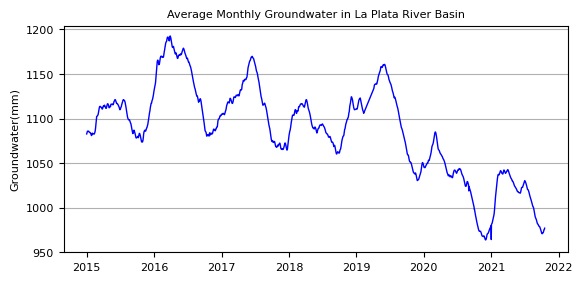

In [27]:
#GW across the basin 2015-2020 monthly 
plt.rc('font', size = 8)
color1= '#F03E3E'
color2= '#F8A51B'
color3= 'black'
color4= '#21409A'
color5= '#919a76'
color6= '#2f2f60'

fig2, axs = plt.subplots(sharex=True, figsize=(6.5,3), dpi=100)

axs.plot(groundwater_df['01/01/2015':],color='blue',linewidth=1)
axs.set_ylabel('Groundwater(mm)')
axs.grid(which='major', axis='y')
axs.set_title('Average Monthly Groundwater in La Plata River Basin', fontsize=8)

axs.set_ylim(bottom=950)

#fig2.tight_layout()

In [20]:
average_seasonal_gw_df = groundwater_df.resample('QS-DEC').mean()


(950.0, 1189.605453491211)

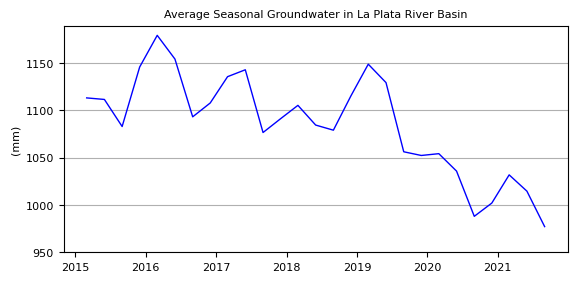

In [28]:
#GW across the basin 2015-2020 seasonal 
plt.rc('font', size = 8)
color1= '#F03E3E'
color2= '#F8A51B'
color3= 'black'
color4= '#21409A'
color5= '#919a76'
color6= '#2f2f60'


fig2, axs = plt.subplots(sharex=True, figsize=(6.5,3), dpi=100)

axs.plot(average_seasonal_gw_df['01/01/2015':],color='blue',linewidth=1)
axs.set_ylabel('(mm)')
axs.grid(which='major', axis='y')
axs.set_title('Average Seasonal Groundwater in La Plata River Basin', fontsize=8)

axs.set_ylim(bottom=950)

#fig2.tight_layout()

In [22]:
temp_df= temp_df.resample('M').mean()

(285.0, 300.6807464599609)

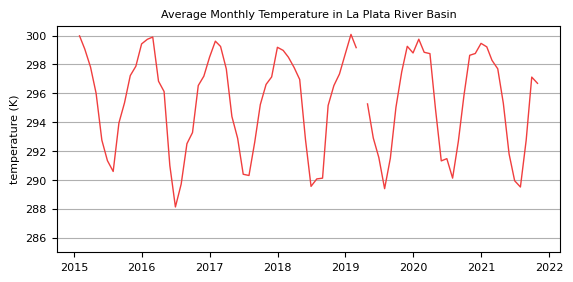

In [23]:
#Monthly Temperature across the basin 2015-2020
plt.rc('font', size = 8)
color1= '#F03E3E'
color2= '#F8A51B'
color3= 'black'
color4= '#21409A'
color5= '#919a76'
color6= '#2f2f60'

fig2, axs = plt.subplots(sharex=True, figsize=(6.5,3), dpi=100)

axs.plot(temp_df['01/01/2015':],color=color1,linewidth=1)
axs.set_ylabel('temperature (K)')
axs.grid(which='major', axis='y')
axs.set_title('Average Monthly Temperature in La Plata River Basin', fontsize=8)

axs.set_ylim(bottom=285)

#fig2.tight_layout()

In [24]:
average_seasonal_temp_df = temp_df.resample('QS-DEC').mean()


(288.0, 300.17896575927733)

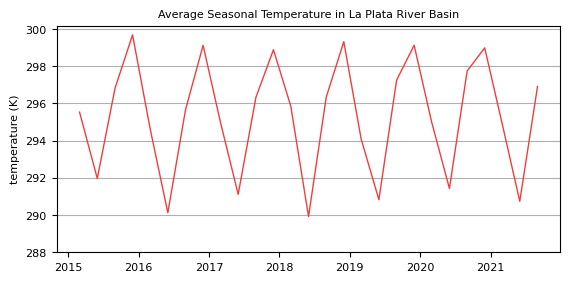

In [26]:
#Seaonal Temperature across the basin 2015-2020
plt.rc('font', size = 8)
color1= '#F03E3E'
color2= '#F8A51B'
color3= 'black'
color4= '#21409A'
color5= '#919a76'
color6= '#2f2f60'

fig2, axs = plt.subplots(sharex=True, figsize=(6.5,3), dpi=100)

axs.plot(average_seasonal_temp_df['01/01/2015':],color=color1,linewidth=1)
axs.set_ylabel('temperature (K)')
axs.grid(which='major', axis='y')
axs.set_title('Average Seasonal Temperature in La Plata River Basin', fontsize=8)

axs.set_ylim(bottom=288)

#fig2.tight_layout()

In [51]:
gldas.SoilMoist_RZ_tavg.isel(lat=0,lon=0,time=0).value

AttributeError: 'DataArray' object has no attribute 'value'

In [22]:
#Soil Moisture Using GLDAS Noah LSM
filename = ['la_plata']

def extract_values(i):
    shdf = salem.read_shapefile('C:/Users/Jessica Besnier/Documents/Fall 2021/AGU data/river_basin_shape-file/'+filename[i] +'.shp')

    ssm = gldas.SoilMoist_S_tavg.salem.roi(shape=shdf)
    rzsm = gldas.SoilMoist_RZ_tavg.salem.roi(shape=shdf)
    psm = gldas.SoilMoist_P_tavg.salem.roi(shape=shdf)

    ssm_df = ssm.mean(['lat','lon']) .to_dataframe('Values')
    rzsm_df = rzsm.mean(['lat','lon']).to_dataframe('Values')
    psm_df = psm.mean(['lat','lon']).to_dataframe('Values')

    return ssm_df,rzsm_df, psm_df

la_plata_ssm, la_plata_rzsm, la_plata_psm = extract_values(0)

In [52]:
la_plata_ssm

,Values
time,
2003-02-01,6.010392
2015-01-01,5.841748
2015-01-02,5.867162
2015-01-03,5.827370
2015-01-04,5.875309
...,...
2021-10-12,5.152946
2021-10-13,5.159666
2021-10-14,5.233545


In [10]:
average_seasonal_ssm =la_plata_ssm.resample('QS-DEC').mean(['lat','lon'])
average_seasonal_rzsm =la_plata_rzsm.resample('QS-DEC').mean(['lat','lon'])
average_seasonal_psm =la_plata_psm.resample('QS-DEC').mean(['lat','lon'])

ValueError: the first argument to .resample must be a dictionary

In [20]:
gldas

<xarray.Dataset>
Dimensions:            (lat: 600, lon: 1440, time: 2247, bnds: 2)
Coordinates:
  * lat                (lat) float32 -59.88 -59.62 -59.38 ... 89.38 89.62 89.88
  * lon                (lon) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * time               (time) datetime64[ns] 2003-02-01 ... 2021-10-16
Dimensions without coordinates: bnds
Data variables: (12/25)
    time_bnds          (time, bnds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    Swnet_tavg         (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
    Lwnet_tavg         (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
    Qle_tavg           (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
    Qh_tavg            (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
    Qg_tavg            (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
    ...                 ...
    ESoil_tavg         (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
    CanopInt_tavg      (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
    EvapSnow_tavg      (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
    ACond_tavg         (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
    TWS_tavg           (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
    GWS_tavg           (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
Attributes: (12/14)
    missing_value:          -9999.0
    tavg definision::       24-hour average
    title:                  GLDAS2.2 LIS land surface model output
    institution:            NASA GSFC HSL
    source:                 CLSM_F2.5/CSR_GRACE_GRACE-FO_RL06_Mascons_all-cor...
    references:             Li_etal_WRR_2019, Li_etal_SciRep_2019, Li_etal_GR...
    ...                     ...
    comment:                website: https://ldas.gsfc.nasa.gov/gldas, https:...
    MAP_PROJECTION:         EQUIDISTANT CYLINDRICAL
    SOUTH_WEST_CORNER_LAT:  -59.875
    SOUTH_WEST_CORNER_LON:  -179.875
    DX:                     0.25
    DY:                     0.25

In [ ]:
average_seasonal_ssm =la_plata_ssm.resample('QS-DEC').mean(['lat','lon'])
average_seasonal_rzsm =la_plata_rzsm.resample('QS-DEC').mean(['lat','lon'])
average_seasonal_psm =la_plata_psm.resample('QS-DEC').mean(['lat','lon'])

In [44]:
la_plata_psm

In [ ]:
fig,ax = plt.subplots(figsize=(8,3))
la_plata_psm['2015':].plot(marker='o',legend=False,title='La Plata River Basin Profile Soil Moisture', ax=ax)
ax.set_ylabel('kg/m2')
ax.set_xlabel(None)
fig.tight_layout()

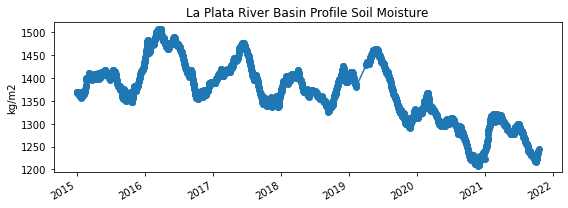

In [32]:
fig,ax = plt.subplots(figsize=(8,3))
la_plata_psm['2015':].plot(marker='o',legend=False,title='La Plata River Basin Profile Soil Moisture', ax=ax)
ax.set_ylabel('kg/m2')
ax.set_xlabel(None)
fig.tight_layout()

In [56]:
rz= la_plata_rzsm.resample('1M').mean()
ssm= la_plata_ssm.resample('1M').mean()

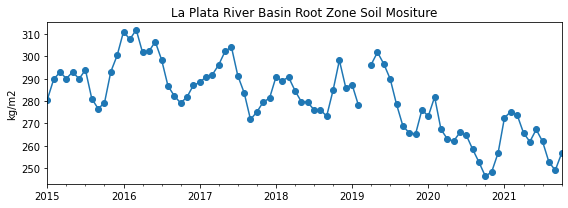

In [57]:
fig,ax = plt.subplots(figsize=(8,3))
rz['2015':].plot(marker='o',legend=False,title='La Plata River Basin Root Zone Soil Mositure', ax=ax)
ax.set_ylabel('kg/m2')
ax.set_xlabel(None)
fig.tight_layout()

In [59]:
gldas

<xarray.Dataset>
Dimensions:            (lat: 600, lon: 1440, time: 2247, bnds: 2)
Coordinates:
  * lat                (lat) float32 -59.88 -59.62 -59.38 ... 89.38 89.62 89.88
  * lon                (lon) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * time               (time) datetime64[ns] 2003-02-01 ... 2021-10-16
Dimensions without coordinates: bnds
Data variables: (12/25)
    time_bnds          (time, bnds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    Swnet_tavg         (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
    Lwnet_tavg         (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
    Qle_tavg           (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
    Qh_tavg            (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
    Qg_tavg            (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
    ...                 ...
    ESoil_tavg         (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
    CanopInt_tavg      (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
    EvapSnow_tavg      (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
    ACond_tavg         (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
    TWS_tavg           (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
    GWS_tavg           (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
Attributes: (12/14)
    missing_value:          -9999.0
    tavg definision::       24-hour average
    title:                  GLDAS2.2 LIS land surface model output
    institution:            NASA GSFC HSL
    source:                 CLSM_F2.5/CSR_GRACE_GRACE-FO_RL06_Mascons_all-cor...
    references:             Li_etal_WRR_2019, Li_etal_SciRep_2019, Li_etal_GR...
    ...                     ...
    comment:                website: https://ldas.gsfc.nasa.gov/gldas, https:...
    MAP_PROJECTION:         EQUIDISTANT CYLINDRICAL
    SOUTH_WEST_CORNER_LAT:  -59.875
    SOUTH_WEST_CORNER_LON:  -179.875
    DX:                     0.25
    DY:                     0.25

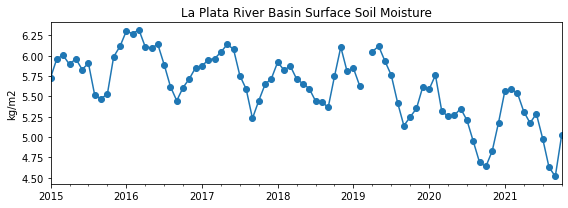

In [58]:
fig,ax = plt.subplots(figsize=(8,3))
ssm['2015':].plot(marker='o',legend=False,title='La Plata River Basin Surface Soil Moisture', ax=ax)
ax.set_ylabel('kg/m2')
ax.set_xlabel(None)
fig.tight_layout()

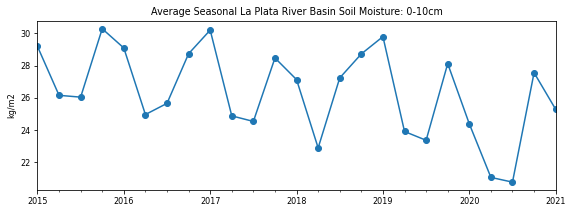

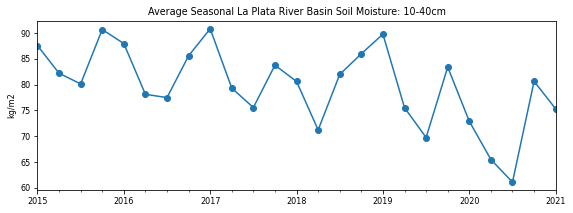

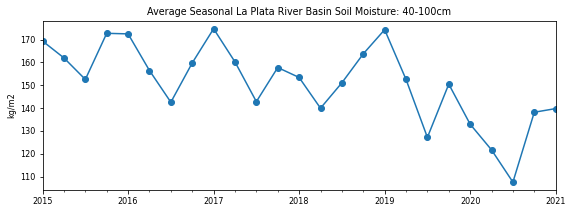

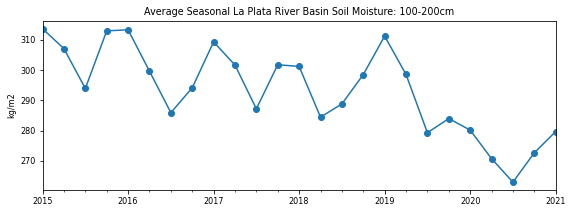

In [36]:
fig,ax = plt.subplots(figsize=(8,3))
average_seasonal_ssm['2015':].plot(marker='o',legend=False,title='Average Seasonal La Plata River Basin Soil Moisture: 0-10cm', ax=ax)
ax.set_ylabel('kg/m2')
ax.set_xlabel(None)
fig.tight_layout()

fig,ax = plt.subplots(figsize=(8,3))
average_seasonal_rzsm['2015':].plot(marker='o',legend=False,title='Average Seasonal La Plata River Basin Soil Moisture: 10-40cm', ax=ax)
ax.set_ylabel('kg/m2')
ax.set_xlabel(None)
fig.tight_layout()

fig,ax = plt.subplots(figsize=(8,3))
average_seasonal_psm['2015':].plot(marker='o',legend=False,title='Average Seasonal La Plata River Basin Soil Moisture: 40-100cm', ax=ax)
ax.set_ylabel('kg/m2')
ax.set_xlabel(None)
fig.tight_layout()


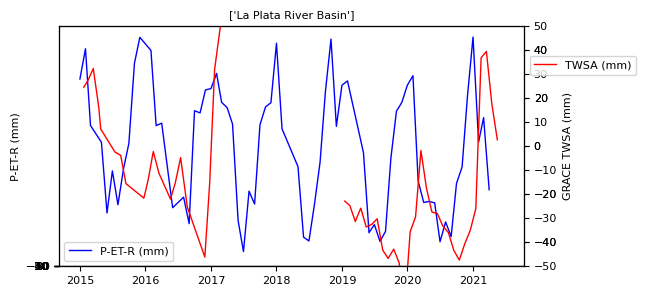

In [38]:
#Graph Monthly TWSA and P-ET-R data
tick_range = range(-50,60,10)
title = ['La Plata River Basin']

plt.rc('font', size=8)

fig, axs = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True, figsize=(6.5,3), dpi=100)

lns1 = axs.plot(lhs_df['01/01/2015':],color='blue',linewidth=1)
axs.set_ylabel('P-ET-R (mm)')
axs.grid(which='major',axis='y')

ax2 = axs.twinx()
lns2 = ax2.plot((twsa_df*10)['01/01/2015':'06/01/2017'],color='red',linewidth=1)
lns3= ax2.plot((twsa_df*10)['01/01/2019':'06/01/2021'],color='red',linewidth=1)
ax2.plot(twsa_df['06/01/2021':],color='red',linewidth=1)
ax2.set_ylabel('GRACE TWSA (mm)')
ax2.set_ylim([-50,50])

ax3 = axs.twinx()
ax3.plot(twsa_df['06/01/2021':],color='red',linewidth=1)
ax3.set_ylim([-50,50])

axs.set_title(title,fontsize=8)

axs.set_yticks(tick_range)
ax2.set_yticks(tick_range)

axs.set_yticks(tick_range)

axs.legend(['P-ET-R (mm)'])
ax2.legend(['TWSA (mm)'],bbox_to_anchor = (1,0.9))

fig.tight_layout()


In [39]:
#changing data from monthly to seasons for lhs and twsa data
average_seasonal_lhs = lhs.resample(time='QS-DEC').mean()
average_seasonal_twsa = twsa.resample(time='QS-DEC').mean()

C:\Users\Jessica Besnier\anaconda3\envs\earth-analytics-python\lib\site-packages\dask\array\numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


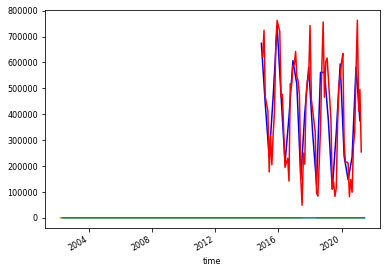

In [40]:
#plot monthly vs seasonal
average_seasonal_lhs.mean(['lat','lon']).plot(color='blue')
lhs.mean(['lat','lon']).plot(color='red')

average_seasonal_twsa.mean(['lat','lon']).plot(color='orange')
twsa.mean(['lat','lon']).plot(color='teal')

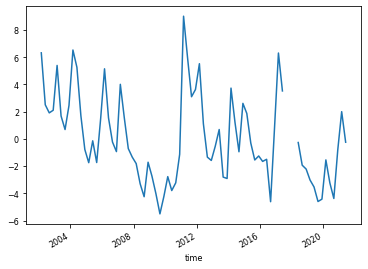

In [41]:
average_seasonal_twsa.mean(['lat','lon']).plot()

In [40]:
average_seasonal_twsa.time
#['2015-01-22T12:00:00.000000000':'2017-06-11T00:00:00.000000000']

TypeError: '>' not supported between instances of 'numpy.ndarray' and 'str'

In [43]:
average_seasonal_twsa_df = average_seasonal_twsa.mean(['lat','lon']).to_dataframe('twsa')

In [44]:
average_seasonal_twsa_df['2015':'2017'].index

DatetimeIndex(['2015-03-01', '2015-06-01', '2015-09-01', '2015-12-01',
               '2016-03-01', '2016-06-01', '2016-09-01', '2016-12-01',
               '2017-03-01', '2017-06-01', '2017-09-01', '2017-12-01'],
              dtype='datetime64[ns]', name='time', freq='QS-DEC')

C:\Users\Jessica Besnier\anaconda3\envs\earth-analytics-python\lib\site-packages\dask\array\numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


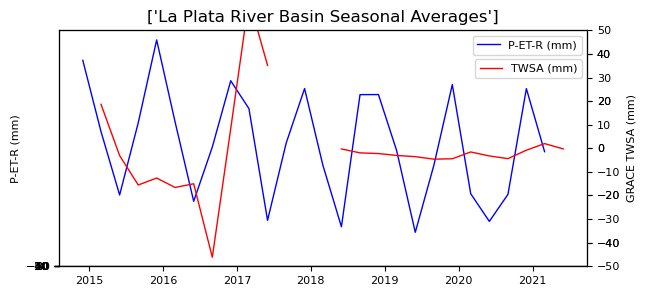

In [47]:
#seasonal graph of TWSA vs P-ET-R
tick_range = range(-50,60,10)
title = ['La Plata River Basin Seasonal Averages']

plt.rc('font', size=8)

fig, axs = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True, figsize=(6.5,3), dpi=100)

lns1 = axs.plot(average_seasonal_lhs.time,average_seasonal_lhs.mean(['lat','lon']),color='blue',linewidth=1)
axs.set_ylabel('P-ET-R (mm)')
axs.grid(which='major',axis='y')

ax2 = axs.twinx()
lns2 = ax2.plot(average_seasonal_twsa_df['2015':'2017'].index,average_seasonal_twsa_df['2015':'2017']*10,color='red',linewidth=1)
#lns2 = ax2.plot(average_seasonal_twsa.time,average_seasonal_twsa.mean(['lat','lon']),color='red',linewidth=1)

# lns2 = ax2.plot((average_seasonal_twsa.mean(['lat','lon'])*10)['03/01/2002':'09/01/2017'],color='red',linewidth=1)
# lns3= ax2.plot((average_seasonal_twsa.mean(['lat','lon'])*10)['06/01/2018':],color='red',linewidth=1)
ax2.set_ylabel('GRACE TWSA (mm)')
ax2.set_ylim([-50,50])

ax3 = axs.twinx()
ax3.plot(average_seasonal_twsa_df['06/01/2018':'06/01/2021'],color='red',linewidth=1)
ax3.set_ylim([-50,50])

axs.set_title(title,fontsize=12)

axs.set_yticks(tick_range)
ax2.set_yticks(tick_range)

axs.xaxis.set_major_locator(mdates.YearLocator(1))
axs.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))


axs.legend(['P-ET-R (mm)'])
ax2.legend(['TWSA (mm)'],bbox_to_anchor = (1,0.9))

fig.tight_layout()


In [10]:
p_watershed = p.mean(['lat','lon']).to_dataframe()
et_watershed = et.mean(['lat','lon']).to_dataframe()
r_watershed = r.mean(['lat','lon']).to_dataframe('runoff')
gw_watershed = groundwater.mean(['lat','lon']).to_dataframe
temp_watershed = temp.mean(['lat','lon']).to_dataframe

In [11]:
#converting p,et,r to seasonal 
average_seasonal_p = p_watershed.resample('QS-DEC').mean()
average_seasonal_et = et_watershed.resample('QS-DEC').mean()
average_seasonal_r = r_watershed.resample('QS-DEC').mean()

cumulative_seasonal_p = p_watershed.resample('QS-DEC').sum()
cumulative_seasonal_et = et_watershed.resample('QS-DEC').sum()
cumulative_seasonal_r = r_watershed.resample('QS-DEC').sum()


In [77]:
average_seasonal_gw = gw_watershed.resample('QS-DEC').mean()
average_seasonal_temp = temp_watershed.resample('QS-DEC').mean()
cumulative_seasonal_r = r_watershed.resample('QS-DEC').sum()
cumulative_seasonal_gw = gw_watershed.resample('QS-DEC').sum()

AttributeError: 'function' object has no attribute 'resample'

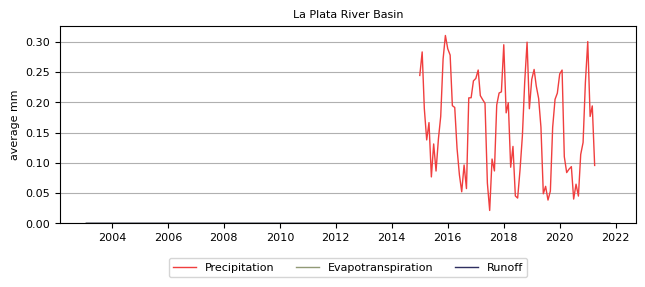

In [87]:
#monthly/ daily P, ET, R
plt.rc('font', size = 8)
color1= '#F03E3E'
color2= '#F8A51B'
color3= 'black'
color4= '#21409A'
color5= '#919a76'
color6= '#2f2f60'

fig2, axs = plt.subplots(sharex=True, figsize=(6.5,3), dpi=100)

axs.plot(p_watershed,color=color1,linewidth=1)
axs.set_ylabel('average mm')
axs.grid(which='major', axis='y')
axs.set_title('La Plata River Basin', fontsize=8)

axs.plot(et_watershed,color=color5,linewidth=1)
axs.plot(r_watershed,color=color6,linewidth=1)
axs.set_ylim(bottom=0)

axs.legend(['Precipitation','Evapotranspiration','Runoff'],loc='lower center',ncol=4,bbox_to_anchor=(0.5, -0.3), fontsize=8)
fig2.tight_layout()

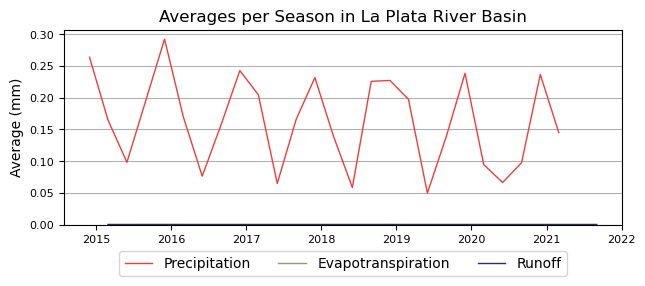

In [69]:
#seasonal line plot of p, et, and r 
plt.rc('font', size = 8)
color1= '#F03E3E'
color2= '#F8A51B'
color3= 'black'
color4= '#21409A'
color5= '#919a76'
color6= '#2f2f60'

fig2, axs = plt.subplots(sharex=True, figsize=(6.5,3), dpi=100)

axs.plot(average_seasonal_p,color=color1,linewidth=1)
axs.set_ylabel('Average (mm)', fontsize=10)
axs.grid(which='major', axis='y')
axs.set_title('Averages per Season in La Plata River Basin', fontsize=12)

axs.plot(average_seasonal_et['2015':],color=color5,linewidth=1)
axs.plot(average_seasonal_r['2015':],color=color6,linewidth=1)
axs.set_ylim(bottom=0)

axs.legend(['Precipitation','Evapotranspiration','Runoff'],loc='lower center',ncol=4,bbox_to_anchor=(0.5, -0.3), fontsize=10)
fig2.tight_layout()

KeyError: 'precipitation'

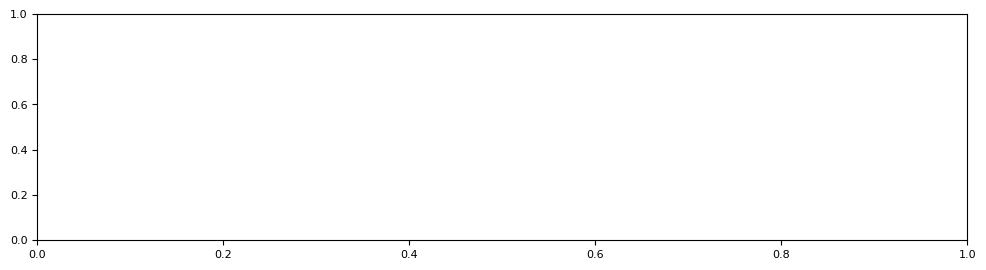

In [44]:
#precipitation bar plot monthly
import matplotlib.ticker as ticker
plt.rc('font', size = 8)
color1= '#F03E3E'
color2= '#F8A51B'
color3= 'black'
color4= '#21409A'

fig3, axs = plt.subplots(sharex=True, figsize=(12,3), dpi=100)

p_watershed.reset_index().plot.bar(x='time',y='precipitation',ax=axs)
axs.set_ylabel('mm')
axs.grid(which='major',axis='y')
axs.set_title('Precipitation',fontsize=8)

ticklabels = ['']*len(p_watershed.index)
ticklabels[::12] = [item.strftime('%Y') for item in p_watershed.index[::12]]
axs.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()

axs.set_ylim(bottom=0)

axs.legend(['La plata'],loc='lower center',ncol=4,bbox_to_anchor=(0.5, -0.25), fontsize=8)

fig3.tight_layout()

In [ ]:
#precipitation season bar plot
import matplotlib.ticker as ticker
plt.rc('font', size = 8)
color1= '#F03E3E'
color2= '#F8A51B'
color3= 'black'
color4= '#21409A'

fig3, axs = plt.subplots(sharex=True, figsize=(12,3), dpi=100)

average_seasonal_p.reset_index().plot.bar(x='time',y='precipitation',ax=axs)
axs.set_ylabel('mm')
axs.grid(which='major',axis='y')
axs.set_title('Precipitation',fontsize=8)

ticklabels = ['']*len(p_watershed.index)
ticklabels[::12] = [item.strftime('%Y') for item in p_watershed.index[::12]]
axs.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()

axs.set_ylim(bottom=0)

axs.legend(['La plata'],loc='lower center',ncol=4,bbox_to_anchor=(0.5, -0.25), fontsize=8)

fig3.tight_layout()

In [ ]:
#evapotranspiration season bar plot
import matplotlib.ticker as ticker
plt.rc('font', size = 8)
color1= '#F03E3E'
color2= '#F8A51B'
color3= 'black'
color4= '#21409A'

fig3, axs = plt.subplots(sharex=True, figsize=(12,3), dpi=100)

average_seasonal_et.reset_index().plot.bar(x='time',y='Evapotranspiration',ax=axs)
axs.set_ylabel('mm')
axs.grid(which='major',axis='y')
axs.set_title('Evapotranspiration',fontsize=8)

ticklabels = ['']*len(p_watershed.index)
ticklabels[::12] = [item.strftime('%Y') for item in p_watershed.index[::12]]
axs.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()

axs.set_ylim(bottom=0)

axs.legend(['La plata'],loc='lower center',ncol=4,bbox_to_anchor=(0.5, -0.25), fontsize=8)

fig3.tight_layout()

In [ ]:
#runoff season bar plot 
import matplotlib.ticker as ticker
plt.rc('font', size = 8)
color1= '#F03E3E'
color2= '#F8A51B'
color3= 'black'
color4= '#21409A'

fig3, axs = plt.subplots(sharex=True, figsize=(12,3), dpi=100)

average_seasonal_r.reset_index().plot.bar(x='time',y='Runoff',ax=axs)
axs.set_ylabel('mm')
axs.grid(which='major',axis='y')
axs.set_title('Runoff',fontsize=8)

ticklabels = ['']*len(p_watershed.index)
ticklabels[::12] = [item.strftime('%Y') for item in p_watershed.index[::12]]
axs.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()

axs.set_ylim(bottom=0)

axs.legend(['La plata'],loc='lower center',ncol=4,bbox_to_anchor=(0.5, -0.25), fontsize=8)

fig3.tight_layout()